# PSM for coral d18O

In this tutorial, we introduce the PSM for coral d18O in `cfr`.

In [1]:
%load_ext autoreload
%autoreload 2

import cfr

## Data preparation

### Proxy

In [2]:
pdb = cfr.ProxyDatabase().fetch('PAGES2kv2')

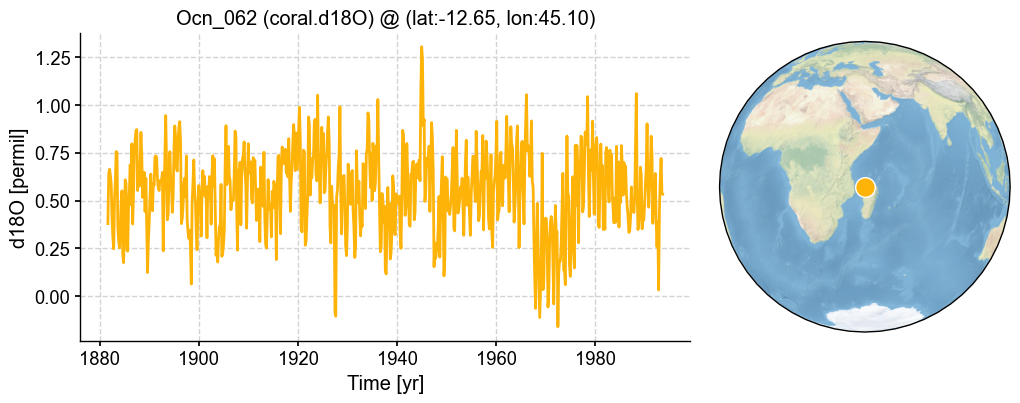

In [3]:
pobj = pdb['Ocn_062']
fig, ax = pobj.plot()

### Model

In [4]:
# note here the nc files have been interpolated to the atmos grid
%%time
dirpath = './data/icesm_last_millennium_historical'

model_tos = cfr.ClimateField().load_nc(os.path.join(dirpath, 'tos_sfc_Omon_iCESM_past1000historical_085001-200512_interp.nc'))
model_d18Osw = cfr.ClimateField().load_nc(os.path.join(dirpath, 'd18Osw_sfc_Omon_iCESM_past1000historical_085001-200512_interp.nc'))

CPU times: user 1.94 s, sys: 11.3 ms, total: 1.95 s
Wall time: 2.13 s


## Get climate data for a specific `ProxyRecord`

In [5]:
%%time

pobj.del_clim()
pobj.get_clim(model_tos, tag='model')
pobj.get_clim(model_d18Osw, tag='model')

CPU times: user 343 ms, sys: 7.56 s, total: 7.9 s
Wall time: 2min 46s


## Create a PSM object

In [6]:
mdl = cfr.psm.Coral_d18O(pobj)

In [7]:
%%time
pp = mdl.forward()

CPU times: user 382 µs, sys: 207 µs, total: 589 µs
Wall time: 379 µs


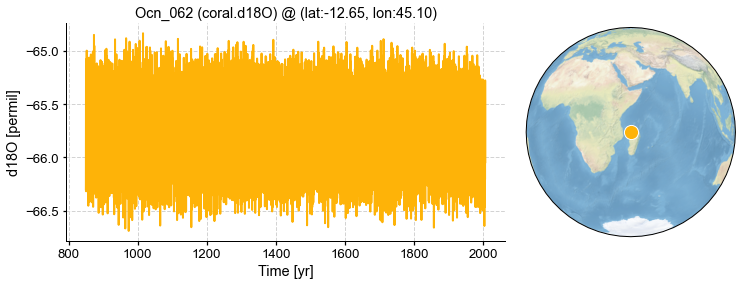

In [8]:
fig, ax = pp.plot()